# Keras 入门 - 笑脸识别
   Keras是为了使深度学习工程师能够很快地建立和实验不同的模型的框架，正如TensorFlow是一个比Python更高级的框架，Keras是一个更高层次的框架，并提供了额外的抽象方法。最关键的是Keras能够以最短的时间让想法变为现实。然而，Keras比底层框架更具有限制性，所以有一些非常复杂的模型可以在TensorFlow中实现，但在Keras中却没有（没有更多困难）。 话虽如此，Keras对许多常见模型都能正常运行。

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import kt_utils 

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


## 使用Keras框架构建模型
<img src="images/20180509110751379.png" style="width:350px;height:270px;">

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = kt_utils.load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def HappyModel(input_shape):
    """
    实现一个检测笑容的模型

    参数：
        input_shape - 输入的数据的维度
    返回：
        model - 创建的Keras的模型

    """

    #你可以参考和上面的大纲
    X_input = Input(input_shape)

    #使用0填充：X_input的周围填充0
    X = ZeroPadding2D((3, 3))(X_input)

    #对X使用 CONV -> BN -> RELU 块
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    #最大值池化层
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #降维，矩阵转化为向量 + 全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

现在我们已经设计好了我们的模型了，要训练并测试模型我们需要这么做：

- 创建一个模型实体。
- 编译模型，可以使用这个语句：model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])。
- 训练模型：model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)。
- 评估模型：model.evaluate(x = ..., y = ...)。

In [ ]:
#创建一个模型实体
happy_model = HappyModel(X_train.shape[1:])
#编译模型
happy_model.compile("adam","binary_crossentropy", metrics=['accuracy'])
#训练模型,请注意，此操作会花费你大约6-10分钟。
happy_model.fit(X_train, Y_train, epochs=5, batch_size=50)

In [13]:
#评估模型
preds = happy_model.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 4s 24ms/step
Loss = 0.07631173412005107
Test Accuracy = 0.9533333373069763


[[1.]]


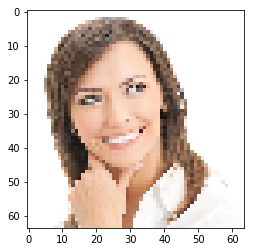

In [29]:
# 预测
img_path = 'xiao.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(happy_model.predict(x))

In [30]:
happy_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________